In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


In [3]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 114MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.82MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 52.9MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.61MB/s]


In [4]:
image,level=train_data[0]

image,level
level

9

he order of our current tensor is often referred to as ```CHW``` (Color Channels, Height, Width).

There's debate on whether images should be represented as ```CHW``` (color channels first) or HWC (color channels last).

PyTorch generally accepts ```NCHW``` (channels first) as the default for many operators.

However, PyTorch also explains that ```NHWC``` (channels last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [5]:
image.shape

len(train_data.data)

dir(train_data)

train_data.data

train_data.classes

len(train_data), len(train_data.targets), len(test_data), len(test_data.targets),

(60000, 60000, 10000, 10000)

In [6]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image Shape torch.Size([1, 28, 28])


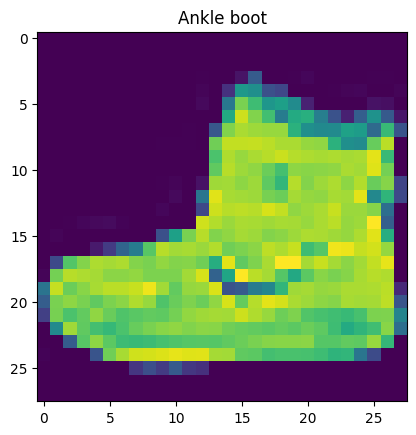

In [7]:
import matplotlib.pyplot as plt
image,lebel=train_data[0]
print(f"Image Shape {image.shape}")
plt.imshow(image.squeeze()) #remove extra 1 dim
plt.title(class_name[lebel]);


Text(0.5, 1.0, 'Random Tensor image with size (20, 22) ')

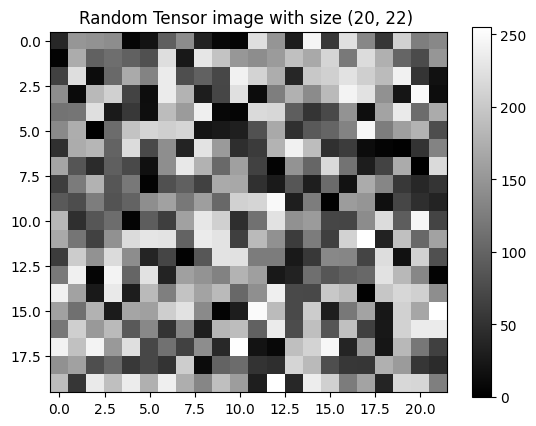

In [8]:
H,W= 20,22
fake_tensor_data=torch.rand(H,W)
fake_tensor_data=torch.randint(0,256, (H,W), dtype=torch.float32) # it will make tensor within 0->255
plt.imshow(fake_tensor_data,cmap='gray')
plt.colorbar()
plt.title(f"Random Tensor image with size {H, W} ")

In [9]:
fake_tensor_data=fake_tensor_data/255
fake_tensor_data

tensor([[0.1529, 0.5882, 0.5725, 0.5529, 0.0235, 0.0745, 0.3725, 0.5490, 0.1333,
         0.0275, 0.0157, 0.8745, 0.5843, 0.1137, 0.9608, 0.2196, 0.8784, 0.5294,
         0.2118, 0.8196, 0.4941, 0.5333],
        [0.0118, 0.6745, 0.3843, 0.4314, 0.3843, 0.3137, 0.8706, 0.0941, 0.9020,
         0.7686, 0.5922, 0.5529, 0.6078, 0.7529, 0.6627, 0.8353, 0.4784, 0.8627,
         0.6902, 0.3961, 0.2941, 0.5882],
        [0.2549, 0.8706, 0.0471, 0.4118, 0.6667, 0.5176, 0.9216, 0.3059, 0.3843,
         0.2784, 0.9451, 0.8314, 0.6784, 0.1490, 0.7843, 0.8157, 0.8863, 0.8118,
         0.7333, 0.9451, 0.2078, 0.0667],
        [0.5529, 0.0392, 0.7255, 0.8157, 0.2627, 0.0510, 0.9216, 0.7020, 0.1137,
         0.2745, 0.8784, 0.0471, 0.4941, 0.6941, 0.5451, 0.7294, 0.9529, 0.8863,
         0.5686, 0.0824, 0.9765, 0.0510],
        [0.4510, 0.4588, 0.8745, 0.1020, 0.2196, 0.0549, 0.7373, 0.6078, 0.9373,
         0.0275, 0.0196, 0.8549, 0.8431, 0.3686, 0.2039, 0.2902, 0.5804, 0.0549,
         0.6392, 0.917

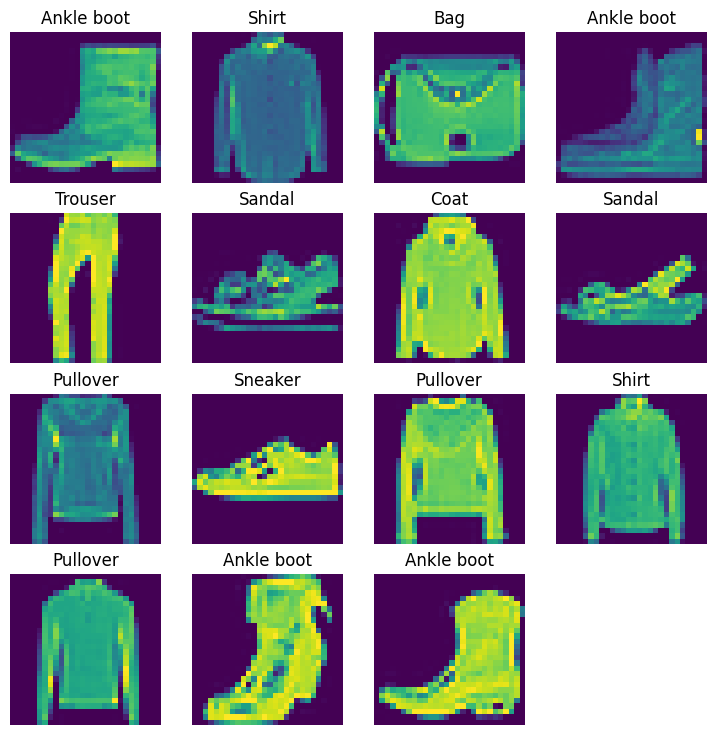

In [10]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
row, col= 4 , 4

for i in range(1, row*col):
    index=torch.randint(0,len(train_data),size=[1]).item()
    image, lebel= train_data[index]
    fig.add_subplot(row, col, i)
    plt.title(class_name[lebel])
    plt.imshow(image.squeeze())
    plt.axis(False)
    
    



In [11]:
torch.randint(0,10, size=[1]).item()

2

In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c4a28e59050>, <torch.utils.data.dataloader.DataLoader object at 0x7c4a28f0a7d0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:


# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

len(train_features_batch)
len(train_labels_batch)
dir(train_features_batch)

len(train_dataloader)

for batch, (X, y) in enumerate(train_dataloader):
    
    print(batch, X, y)
    if batch==5:
        break

0 tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


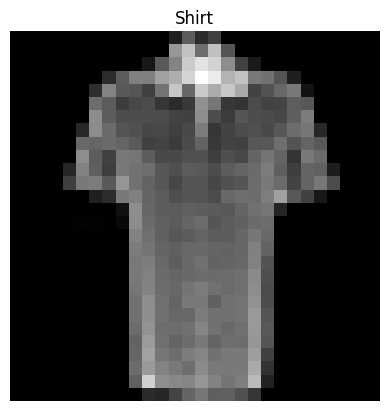

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

Create a Baseline model just 2 layer

In [15]:
flatten_model=nn.Flatten()

x=train_features_batch[0]

output=flatten_model(x)

x.shape, output.shape

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [16]:
from torch import nn

class FashionV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [17]:
torch.manual_seed(42)
model_0 = FashionV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_name) # one for every class
)
model_0.to("cpu")


FashionV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

SetUp Loss function

Add a helper function

In [18]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [19]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [20]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 30.073 seconds


In [22]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [23]:
epochs=3
for epochs in range(epochs):
    print(f"Epochs number {epochs}--- ")
    train_loss=0
    
    for batch, (X,y) in tqdm(enumerate(train_dataloader)):
        model_0.train()
        #do the forward pass
        y_pred=model_0(X)
        #calculate the loss
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        #optimizer zero grad
        optimizer.zero_grad()
        #loss backward
        loss.backward()
        #optimizer step step step step
        optimizer.step()
        if batch % 400==0:
            print(f" Batch number out of {batch}/{len(train_data)}")
    train_loss/=len(train_dataloader)
    print(train_loss)

    #testing test data
    test_loss, test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            test_pred=model_0(X)
            test_loss+=loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    


        
    
    

Epochs number 0--- 


0it [00:00, ?it/s]

 Batch number out of 0/60000
 Batch number out of 400/60000
 Batch number out of 800/60000
 Batch number out of 1200/60000
 Batch number out of 1600/60000
tensor(0.4429, grad_fn=<DivBackward0>)

Train loss: 0.44286 | Test loss: 0.50540, Test acc: 82.36%

Epochs number 1--- 


0it [00:00, ?it/s]

 Batch number out of 0/60000
 Batch number out of 400/60000
 Batch number out of 800/60000
 Batch number out of 1200/60000
 Batch number out of 1600/60000
tensor(0.4343, grad_fn=<DivBackward0>)

Train loss: 0.43426 | Test loss: 0.49740, Test acc: 82.91%

Epochs number 2--- 


0it [00:00, ?it/s]

 Batch number out of 0/60000
 Batch number out of 400/60000
 Batch number out of 800/60000
 Batch number out of 1200/60000
 Batch number out of 1600/60000
tensor(0.4292, grad_fn=<DivBackward0>)

Train loss: 0.42920 | Test loss: 0.45719, Test acc: 84.07%



In [24]:
class FasionV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU() 
        )
    def forward(self, x: torch.tensor):
        return self.layer_stack(x) 

In [25]:
model_1=FasionV1(784,10,len(class_name))
model_1
# model_1.parameters()

FasionV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

setup loss , optimizer

In [26]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

device='cpu'

In [27]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [28]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.45922 | Train accuracy: 54.35%
Test loss: 1.12435 | Test accuracy: 65.76%

Epoch: 1
---------
Train loss: 1.05004 | Train accuracy: 67.80%
Test loss: 1.02114 | Test accuracy: 68.52%

Epoch: 2
---------
Train loss: 0.97942 | Train accuracy: 69.61%
Test loss: 0.98073 | Test accuracy: 69.21%

Train time on cpu: 30.127 seconds


In [29]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

{'model_name': 'FasionV1',
 'model_loss': 0.980731725692749,
 'model_acc': 69.20926517571885}

Now move on CNN Code.

Play with maxpool

In [30]:
# torch.random_manual(42)

# image=torch.randn(size=(32,3,64,64))
# image

torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [31]:
torch.manual_seed(42)

img=torch.randn(size=(32,3,64,64))
one_channel=img[0]

img.shape, one_channel.shape

nn.MaxPool2d(img)

MaxPool2d(
  kernel_size=tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
            [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
            [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
            ...,
            [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
            [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
            [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],
  
           [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
            [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
            [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
            ...,
            [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
            [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
            [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],
  
           [[-0.7978,  1.0261,  1.1465,  ...,  

Conv Layer 

In [32]:
torch.manual_seed(42)

image=torch.randn(size=(32,3,64,64))
img=image[0]
conv_layer=nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0 
)

conv_layer(img).shape


torch.Size([10, 62, 62])

Right now our single image test_image only has a shape of ```[color_channels, height, width] or [3, 64, 64].```

We can fix this for a single image using ```test_image.unsqueeze(dim=0)``` to add an extra dimension for ```N```.

In [33]:
img.shape
img.unsqueeze(0).shape

conv_layer(img.unsqueeze(0)).shape



torch.Size([1, 10, 62, 62])

Change the value of conv_layer

In [34]:
torch.manual_seed(42)

image=torch.randn(size=(32,3,64,64))
img=image[0]
conv_layer_2=nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=5,
    stride=1,
    padding=0 
)
img.shape,conv_layer_2(img.unsqueeze(dim=0)).shape


(torch.Size([3, 64, 64]), torch.Size([1, 10, 60, 60]))

In [35]:
conv_layer_2.weight.shape, conv_layer_2.bias.shape

(torch.Size([10, 3, 5, 5]), torch.Size([10]))

In [36]:
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.0588, -0.0559, -0.0394,  0.0326,  0.0167],
                        [-0.0030, -0.0635,  0.0444,  0.0999, -0.1097],
                        [-0.0050,  0.0225, -0.1087, -0.0346, -0.0486],
                        [-0.0729, -0.0632,  0.0094,  0.0145,  0.1017],
                        [ 0.0373, -0.0229, -0.0895, -0.1048,  0.0825]],
              
                       [[-0.0168, -0.0695, -0.0360, -0.0689,  0.0982],
                        [-0.0821,  0.0309,  0.0390, -0.0527,  0.1034],
                        [ 0.0160,  0.0223, -0.1150,  0.0393, -0.1148],
                        [-0.0109,  0.0995,  0.0153,  0.0118,  0.0804],
                        [-0.0927, -0.0541, -0.0824, -0.0480, -0.0271]],
              
                       [[ 0.0685,  0.0025,  0.0266, -0.0628, -0.1127],
                        [-0.0248, -0.0883,  0.0273,  0.0500,  0.0844],
                        [-0.0216,  0.0067, -0.0454, -0.0103, -0.0227],
                     

Using ```nn.MaxPool2d()```

In [37]:
torch.manual_seed(42)

image=torch.randn(size=(32,3,64,64))

test_img=image[0]

print(f"Original Image Shape {test_img.shape} ")
print(f"Image after unsqueeze {test_img.unsqueeze(dim=0).shape} ")

max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through conv_layer

test_img_in_conv=conv_layer_2(test_img.unsqueeze(dim=0))
print(f"shape after going through conv_2d {test_img_in_conv.shape}")

img_after_going_maxpool=max_pool_layer(test_img_in_conv)

print(f"shape after going through conv_2d and max pool both {img_after_going_maxpool.shape}")


Original Image Shape torch.Size([3, 64, 64]) 
Image after unsqueeze torch.Size([1, 3, 64, 64]) 
shape after going through conv_2d torch.Size([1, 10, 60, 60])
shape after going through conv_2d and max pool both torch.Size([1, 10, 30, 30])


change the value of kernel size 

In [38]:
# torch.manual_seed(42)

img=torch.rand(size=(1,1,8,6))
print(img)

max_pool=nn.MaxPool2d(kernel_size=2)

max_pool_pixel=max_pool(img)
max_pool_pixel.shape

tensor([[[[0.2454, 0.2577, 0.3294, 0.6409, 0.5724, 0.4869],
          [0.2252, 0.6921, 0.9325, 0.0251, 0.4783, 0.5975],
          [0.0293, 0.3503, 0.2894, 0.1845, 0.2265, 0.5407],
          [0.5630, 0.9405, 0.6614, 0.4008, 0.1126, 0.0461],
          [0.8573, 0.4271, 0.1989, 0.3442, 0.2018, 0.9252],
          [0.1443, 0.6340, 0.6687, 0.2718, 0.9479, 0.5692],
          [0.5966, 0.0021, 0.6703, 0.0031, 0.4526, 0.9308],
          [0.5661, 0.5512, 0.8481, 0.0988, 0.2659, 0.1434]]]])


torch.Size([1, 1, 4, 3])

Create A Model for Convolution


In [39]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_name)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Set Loss Function

In [40]:
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.01)



In [41]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.03781 | Train accuracy: 62.34%
Test loss: 0.62514 | Test accuracy: 76.90%

Epoch: 1
---------
Train loss: 0.54922 | Train accuracy: 79.98%
Test loss: 0.49797 | Test accuracy: 81.57%

Epoch: 2
---------
Train loss: 0.45583 | Train accuracy: 83.52%
Test loss: 0.44065 | Test accuracy: 84.21%

Train time on cpu: 105.860 seconds


In [42]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.44064682722091675,
 'model_acc': 84.20527156549521}

In [43]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionV0,0.476639,83.426518
1,FasionV1,0.980732,69.209265
2,FashionMNISTModelV2,0.440647,84.205272


In [44]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionV0,0.476639,83.426518,30.073443
1,FasionV1,0.980732,69.209265,30.127042
2,FashionMNISTModelV2,0.440647,84.205272,105.860214


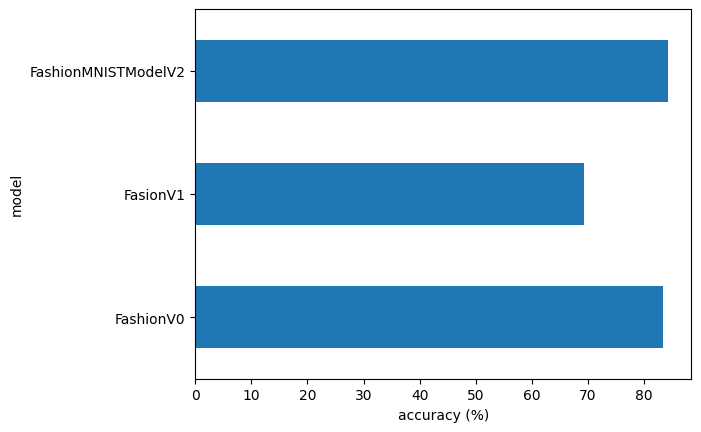

In [45]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [46]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [47]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_name[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [48]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.4324e-07, 2.5359e-08, 5.7486e-08, 5.4556e-08, 9.8744e-09, 9.6588e-01,
         7.2408e-08, 6.6876e-05, 4.4195e-04, 3.3608e-02],
        [3.3205e-02, 7.2896e-01, 7.8680e-04, 2.2406e-01, 8.6628e-03, 6.0395e-05,
         3.3768e-03, 1.4139e-04, 7.3909e-04, 4.0419e-06]])

In [49]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.4324e-07, 2.5359e-08, 5.7486e-08, 5.4556e-08, 9.8744e-09, 9.6588e-01,
         7.2408e-08, 6.6876e-05, 4.4195e-04, 3.3608e-02],
        [3.3205e-02, 7.2896e-01, 7.8680e-04, 2.2406e-01, 8.6628e-03, 6.0395e-05,
         3.3768e-03, 1.4139e-04, 7.3909e-04, 4.0419e-06]])

In [50]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 2, 3, 0, 4, 7, 1]))

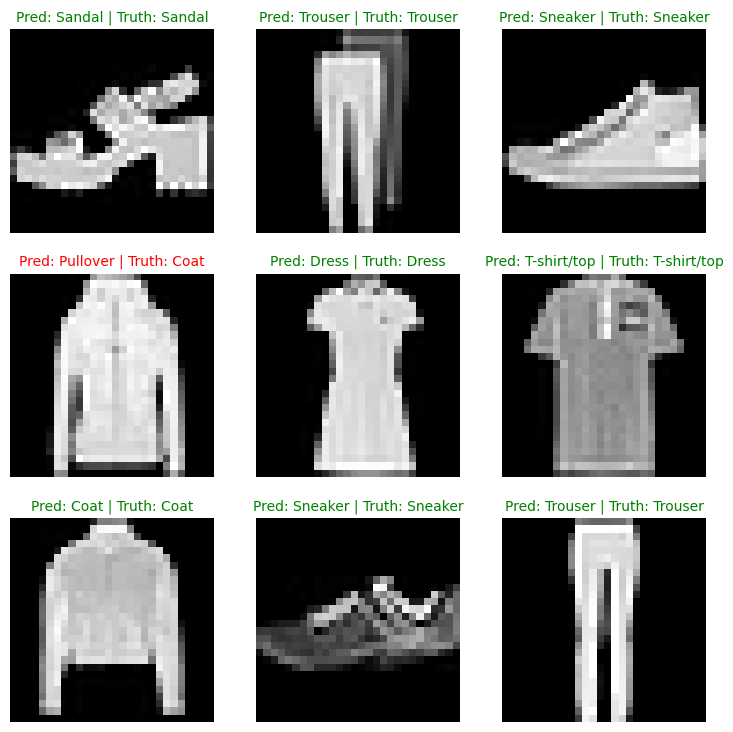

In [51]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

